In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",100)

In [2]:
df=pd.read_csv('LoansTrainingSet.csv')

In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [5]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [6]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


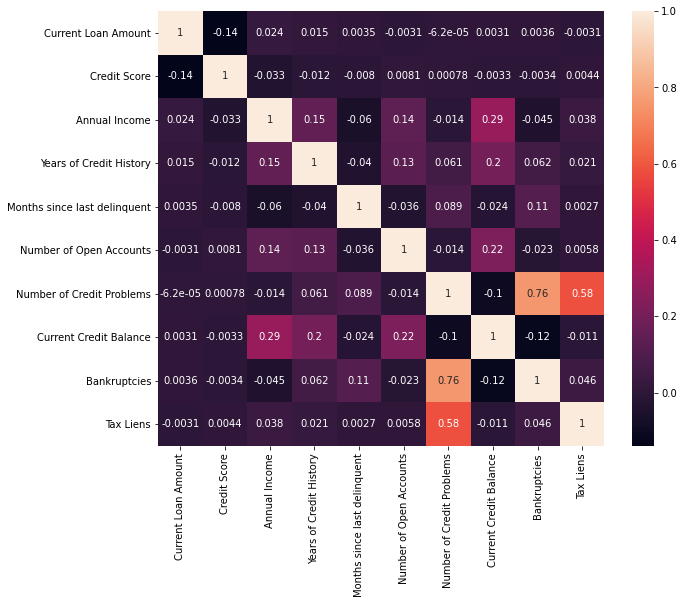

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True);

In [8]:
df.shape

(256984, 19)

In [9]:
df.isnull().sum()   # Lets fill the empty values!

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [10]:
df['Credit Score'].fillna(df['Credit Score'].mean(),inplace=True)
# filled with average value

In [11]:
df["Credit Score"].isnull().sum()

0

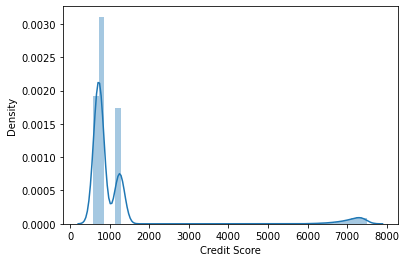

In [12]:
sns.distplot(df['Credit Score']);

<AxesSubplot: xlabel='Credit Score', ylabel='Density'>

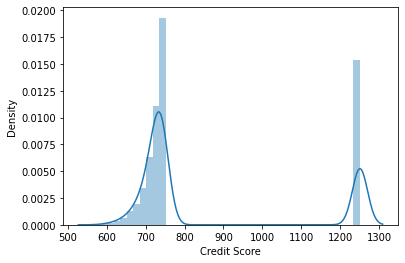

In [13]:
# remove the outliers.
df=df[df['Credit Score']<2000]
sns.distplot(df['Credit Score'])

In [14]:
df.shape

(240797, 19)

In [15]:
df.sample(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
145410,9096c290-0263-427d-a13c-e52628eacf59,68654330-98b5-4c0d-b17c-52a8b8d17419,Charged Off,24708,Long Term,723.0,6 years,Home Mortgage,76099.0,Debt Consolidation,"$1,255.64",26.4,NaN,7,0,28804,35781,0.0,0.0
235258,ea0c64a1-f9fa-4451-9c8b-02b6d99eb064,73928ed1-1fcc-49e3-b860-8c091422d956,Fully Paid,8851,Short Term,741.0,10+ years,Own Home,108174.0,other,$991.59,31.0,NaN,17,0,38127,99032,0.0,0.0
197726,c4a4c234-355d-4aac-835d-a3ea84fe0ba6,3e1501b7-45bf-4b53-a27f-ca9a63499000,Charged Off,5501,Short Term,716.0,2 years,Rent,33675.0,Debt Consolidation,$872.76,6.9,40.0,8,0,4530,5001,0.0,0.0
5892,05e74ea5-dba9-4b2d-9ebe-b17f24e16327,318d10a1-63d2-4044-a6d4-2730a7f35d48,Charged Off,19638,Long Term,722.0,10+ years,Rent,49095.0,Debt Consolidation,$998.27,20.5,NaN,14,2,8231,22368,1.0,1.0
9794,09c6f64d-05f3-4403-ade8-4dc91b4fb2ac,ba37b050-74a9-4fd7-9e1e-28a8dd310ffe,Charged Off,11784,Short Term,736.0,7 years,Rent,63830.0,Debt Consolidation,$574.47,11.3,NaN,5,0,4472,6084,0.0,0.0


In [16]:
df['Annual Income'].fillna(df['Annual Income'].mean(),inplace=True)
# filled with average value

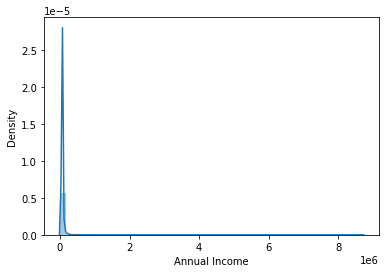

In [17]:
sns.distplot(df['Annual Income']);
#as we can see, there is no outliers.

In [18]:
df['Months since last delinquent'].fillna("0",inplace=True)
df['Months since last delinquent']=df['Months since last delinquent'].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240797 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       240797 non-null  object 
 1   Customer ID                   240797 non-null  object 
 2   Loan Status                   240797 non-null  object 
 3   Current Loan Amount           240797 non-null  int64  
 4   Term                          240797 non-null  object 
 5   Credit Score                  240797 non-null  float64
 6   Years in current job          230270 non-null  object 
 7   Home Ownership                240797 non-null  object 
 8   Annual Income                 240797 non-null  float64
 9   Purpose                       240797 non-null  object 
 10  Monthly Debt                  240797 non-null  object 
 11  Years of Credit History       240797 non-null  float64
 12  Months since last delinquent  240797 non-nul

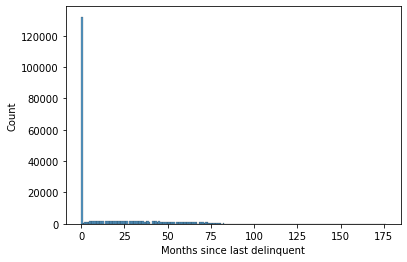

In [20]:
sns.histplot(df['Months since last delinquent']);

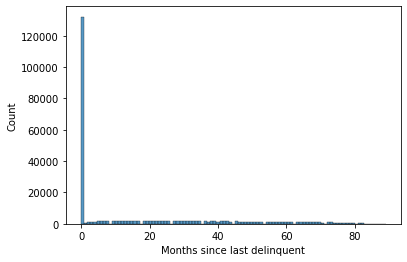

In [21]:
df=df[df['Months since last delinquent']<90]
sns.histplot(df['Months since last delinquent']);
# replace the outliers.

In [22]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Years in current job            10524
Home Ownership                      0
Annual Income                       0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      505
Tax Liens                          23
dtype: int64

In [23]:
df['Years in current job'].replace('[^0-9]',"",inplace=True,regex=True)
#Removed text and punctuation marks in Years in current job

df['Years in current job'].fillna('0',inplace=True)
#NaN values filled with 0

df['Years in current job']=df['Years in current job'].astype(int)
#Years in current job values converted to integer

df['Years in current job'].replace('0',df['Years in current job'].mean(),inplace=True)
#'0's replaced with Years in current job mean value

<AxesSubplot: xlabel='Years in current job', ylabel='Count'>

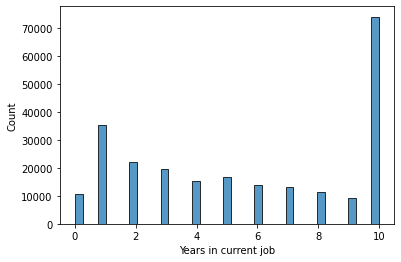

In [24]:
sns.histplot(df['Years in current job'])

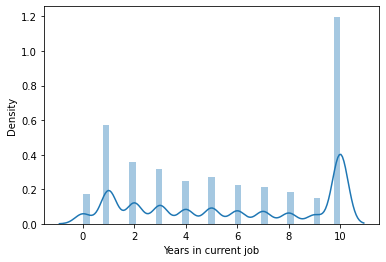

In [25]:
sns.distplot(df["Years in current job"]);

In [26]:
#Maximum Open Credit object halinde bu değerleri float türüne çevrildi
df['Maximum Open Credit'].replace('[a-zA-Z@_!#$%^&*()<>?/\|}{~:]',"0",inplace=True,regex=True)
df['Maximum Open Credit']=df['Maximum Open Credit'].astype(float)

In [27]:
#sns.histplot(df['Maximum Open Credit'])

In [28]:
#Bankruptcies null olanlar 0 ile değiştirildi
df['Bankruptcies'].fillna("0",inplace=True)
#Bankruptcies object türünden int türüne çevrildi
df['Bankruptcies']=df['Bankruptcies'].astype(int)

<AxesSubplot: xlabel='Bankruptcies', ylabel='Count'>

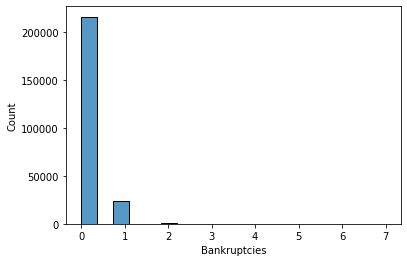

In [29]:
sns.histplot(df['Bankruptcies'])

<AxesSubplot: xlabel='Bankruptcies', ylabel='Count'>

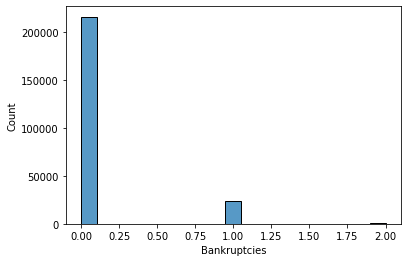

In [30]:
df=df[df['Bankruptcies']<3]
sns.histplot(df['Bankruptcies'])

In [31]:
#Tax Liens null olanlar 0 ile değiştirildi
df['Tax Liens'].fillna("0",inplace=True)
#Tax Liens daha sora object türünden int türüne dönüştürüldü
df['Tax Liens']=df['Tax Liens'].astype(int)

<AxesSubplot: xlabel='Tax Liens', ylabel='Count'>

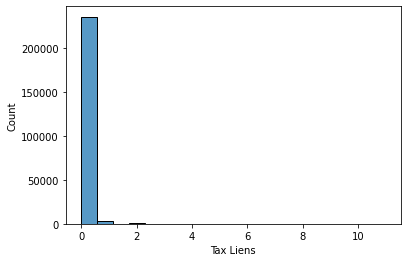

In [32]:
sns.histplot(df['Tax Liens'])

<AxesSubplot: xlabel='Tax Liens', ylabel='Count'>

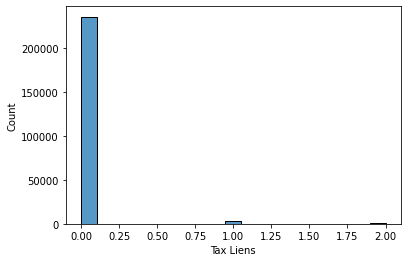

In [33]:
df=df[df['Tax Liens']<3]
sns.histplot(df['Tax Liens'])

In [34]:
#Monthly Debt object türünden fazla olan semboller kaldırılarak float türüne çevrildi
df['Monthly Debt'].replace('[^0-9.]','',inplace=True,regex=True)
df['Monthly Debt']=df['Monthly Debt'].astype(float)

<AxesSubplot: xlabel='Monthly Debt', ylabel='Count'>

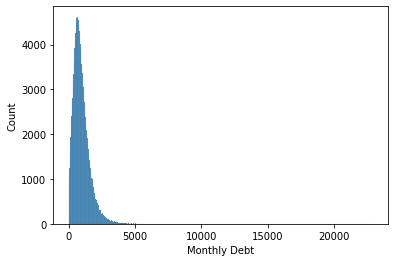

In [35]:
sns.histplot(df['Monthly Debt'])

<AxesSubplot: xlabel='Monthly Debt', ylabel='Count'>

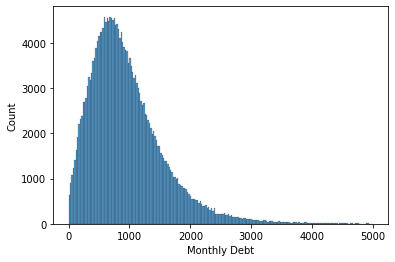

In [36]:
df=df[df['Monthly Debt']<5000]
sns.histplot(df['Monthly Debt'])

In [37]:
df.isnull().sum() #Şuan boş satırımız kalmadı

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [38]:
df.select_dtypes("object_")

,Loan ID,Customer ID,Loan Status,Term,Home Ownership,Purpose
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,Short Term,Home Mortgage,Debt Consolidation
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,Short Term,Home Mortgage,other
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,Short Term,Home Mortgage,Debt Consolidation
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,Short Term,Own Home,Debt Consolidation
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,Short Term,Rent,Debt Consolidation
...,...,...,...,...,...,...
256978,fffe84cf-67a1-468d-ab7b-cf06a9c4ee14,460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,Charged Off,Short Term,Home Mortgage,Debt Consolidation
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,Short Term,Rent,Debt Consolidation
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,Short Term,Own Home,Debt Consolidation
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,Short Term,Home Mortgage,Debt Consolidation


In [39]:
df['Loan Status'].value_counts()

Fully Paid     175516
Charged Off     64301
Name: Loan Status, dtype: int64

<AxesSubplot: xlabel='Loan Status', ylabel='count'>

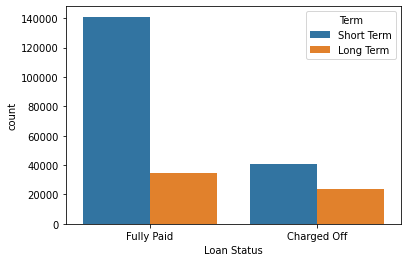

In [40]:
sns.countplot(df['Loan Status'],hue=df['Term'])

In [41]:
df['Term'].value_counts()

Short Term    181522
Long Term      58295
Name: Term, dtype: int64

<AxesSubplot: xlabel='Term', ylabel='count'>

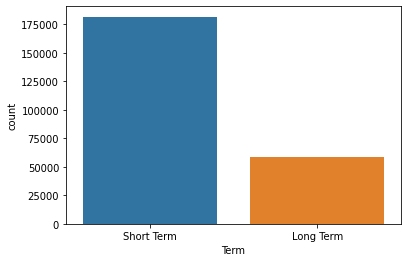

In [42]:
sns.countplot(df['Term'])

In [43]:
df['Home Ownership'].value_counts() 

Home Mortgage    116914
Rent             101032
Own Home          21332
HaveMortgage        539
Name: Home Ownership, dtype: int64

In [44]:
#Home Ownership verilerini düzenlememiz gerekmekte
df['Home Ownership'].replace(['HaveMortgage','Home Mortgage'],'Mortgage',inplace=True)

In [45]:
df['Home Ownership'].value_counts()

Mortgage    117453
Rent        101032
Own Home     21332
Name: Home Ownership, dtype: int64

<AxesSubplot: xlabel='Home Ownership', ylabel='count'>

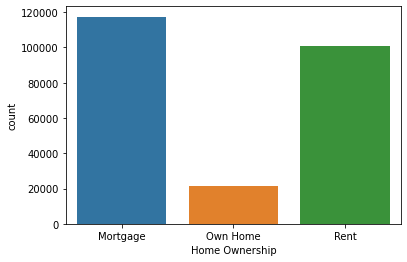

In [46]:
sns.countplot(df['Home Ownership'])

In [47]:
df['Purpose'].value_counts()

Debt Consolidation      190288
Home Improvements        14012
other                    13238
Other                     9104
Business Loan             4241
Buy a Car                 3126
Medical Bills             2654
Take a Trip               1474
Buy House                 1427
Educational Expenses       253
Name: Purpose, dtype: int64

In [48]:
#Purpose alanlarını düzenleyelim
df['Purpose'].replace('other','Other',inplace=True)

In [49]:
df['Purpose'].value_counts()

Debt Consolidation      190288
Other                    22342
Home Improvements        14012
Business Loan             4241
Buy a Car                 3126
Medical Bills             2654
Take a Trip               1474
Buy House                 1427
Educational Expenses       253
Name: Purpose, dtype: int64

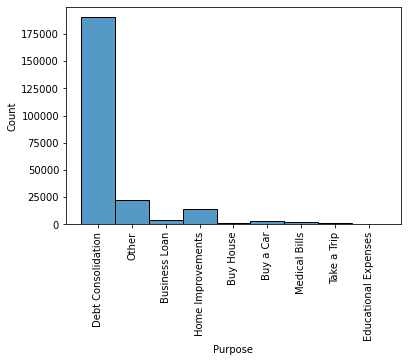

In [50]:
sns.histplot(df['Purpose']);
plt.xticks(rotation=90);

In [51]:
df=df.drop(['Loan ID','Customer ID'],axis=1)

In [52]:
df.sample(5)

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
236988,Charged Off,7888,Short Term,1251.116099,10,Rent,72535.550103,Debt Consolidation,1072.28,12.6,0,11,0,8842,10452.0,0,0
170487,Charged Off,19914,Long Term,1251.116099,7,Mortgage,72535.550103,Debt Consolidation,1041.33,9.5,0,11,0,13094,21715.0,0,0
169798,Fully Paid,99999999,Short Term,673.000000,10,Rent,103299.000000,Buy House,2384.47,23.5,0,15,1,15489,31805.0,1,0
235959,Charged Off,11261,Short Term,1251.116099,0,Mortgage,72535.550103,Debt Consolidation,489.83,17.5,75,10,1,21812,28549.0,1,0
22738,Fully Paid,24238,Long Term,725.000000,2,Mortgage,136337.000000,Home Improvements,1122.50,17.8,0,5,0,13444,14838.0,0,0


In [53]:
x,y=df.drop('Loan Status',axis=1),df[['Loan Status']]

In [54]:
x

,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,11520,Short Term,741.000000,10,Mortgage,33694.000000,Debt Consolidation,584.03,12.3,41,10,0,6760,16056.0,0,0
1,3441,Short Term,734.000000,4,Mortgage,42269.000000,Other,1106.04,26.3,0,17,0,6262,19149.0,0,0
2,21029,Short Term,747.000000,10,Mortgage,90126.000000,Debt Consolidation,1321.85,28.8,0,5,0,20967,28335.0,0,0
3,18743,Short Term,747.000000,10,Own Home,38072.000000,Debt Consolidation,751.92,26.2,0,9,0,22529,43915.0,0,0
4,11731,Short Term,746.000000,4,Rent,50025.000000,Debt Consolidation,355.18,11.5,0,12,0,17391,37081.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256978,11953,Short Term,717.000000,10,Mortgage,39844.000000,Debt Consolidation,982.82,11.7,0,9,1,4176,4783.0,1,0
256979,3911,Short Term,1251.116099,2,Rent,72535.550103,Debt Consolidation,1706.58,19.9,0,16,0,43992,44080.0,0,0
256980,5078,Short Term,737.000000,10,Own Home,77186.000000,Debt Consolidation,1376.47,19.1,47,9,0,1717,9758.0,0,0
256982,12116,Short Term,746.000000,9,Mortgage,52504.000000,Debt Consolidation,297.96,15.1,82,8,0,3315,20090.0,0,0


In [55]:
x=pd.get_dummies(x,drop_first=True)

In [56]:
x

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Short Term,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
0,11520,741.000000,10,33694.000000,584.03,12.3,41,10,0,6760,16056.0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,3441,734.000000,4,42269.000000,1106.04,26.3,0,17,0,6262,19149.0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,21029,747.000000,10,90126.000000,1321.85,28.8,0,5,0,20967,28335.0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,18743,747.000000,10,38072.000000,751.92,26.2,0,9,0,22529,43915.0,0,0,1,1,0,0,0,1,0,0,0,0,0
4,11731,746.000000,4,50025.000000,355.18,11.5,0,12,0,17391,37081.0,0,0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256978,11953,717.000000,10,39844.000000,982.82,11.7,0,9,1,4176,4783.0,1,0,1,0,0,0,0,1,0,0,0,0,0
256979,3911,1251.116099,2,72535.550103,1706.58,19.9,0,16,0,43992,44080.0,0,0,1,0,1,0,0,1,0,0,0,0,0
256980,5078,737.000000,10,77186.000000,1376.47,19.1,47,9,0,1717,9758.0,0,0,1,1,0,0,0,1,0,0,0,0,0
256982,12116,746.000000,9,52504.000000,297.96,15.1,82,8,0,3315,20090.0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [57]:
y=pd.get_dummies(y,drop_first=True)

In [58]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239817 entries, 0 to 256983
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           239817 non-null  int64  
 1   Credit Score                  239817 non-null  float64
 2   Years in current job          239817 non-null  int32  
 3   Annual Income                 239817 non-null  float64
 4   Monthly Debt                  239817 non-null  float64
 5   Years of Credit History       239817 non-null  float64
 6   Months since last delinquent  239817 non-null  int32  
 7   Number of Open Accounts       239817 non-null  int64  
 8   Number of Credit Problems     239817 non-null  int64  
 9   Current Credit Balance        239817 non-null  int64  
 10  Maximum Open Credit           239817 non-null  float64
 11  Bankruptcies                  239817 non-null  int32  
 12  Tax Liens                     239817 non-nul

In [59]:
y.shape,x.shape

((239817, 1), (239817, 24))

In [60]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    g=GaussianNB()
    b=BernoulliNB()
    SVC=SVC()
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    
    algos=[g,b,SVC,KN,D,R,Log]
    algo_names=['GaussianNB','BernoulliNB','SVC','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
        
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result.f1_score=f1_scored
    result.recall_score=recall_scored
    result.precision_score=precision_scored
    result.accuracy_score=accuracy_scored
    classification_funct.result=result.sort_values('f1_score',ascending=False)
    return result.sort_values('f1_score',ascending=False)  
    

In [61]:
classification_funct(x,y)                      

(191853, 24) (47964, 24) (191853, 1) (47964, 1)


,f1_score,recall_score,precision_score,accuracy_score
RandomForestClassifier,0.894142,0.951993,0.842919,0.834459
SVC,0.846853,1.000000,0.734384,0.734384
LogisticRegression,0.846710,0.999603,0.734383,0.734196
BernoulliNB,0.846693,0.997360,0.735574,0.734759
DecisionTreeClassifier,0.819174,0.793010,0.847122,0.742891
KNeighborsClassifier,0.808881,0.846610,0.774370,0.706196
GaussianNB,0.342970,0.207132,0.996449,0.417188


<AxesSubplot: >

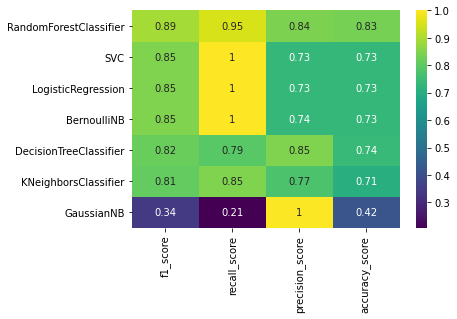

In [62]:
sns.heatmap(classification_funct.result,cmap='viridis',annot=True)